In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [3]:
df = pd.read_csv('name.csv', index_col=0)
df.head()

,threshold,test,exit,sample,exited,correct,confidence,time
0,0.1,0.0,0.0,0.0,1.0,1.0,0.980662,957.6605
1,0.1,0.0,1.0,0.0,1.0,1.0,0.998724,963.6979
2,0.1,0.0,2.0,0.0,1.0,1.0,0.999721,970.4794
3,0.1,0.0,3.0,0.0,1.0,1.0,0.999991,975.8789
4,0.1,0.0,0.0,1.0,1.0,1.0,0.798491,6.0821


In [4]:
df.loc[(df['threshold'] == 0.4) & (df['exit'] == 0) & (df['exited']==1) & (df['correct']==0)]

,threshold,test,exit,sample,exited,correct,confidence,time
6104,0.4,3.0,0.0,26.0,1.0,0.0,0.582412,5.4811
6236,0.4,3.0,0.0,59.0,1.0,0.0,0.455209,5.1131
6544,0.4,3.0,0.0,136.0,1.0,0.0,0.411691,4.7029
7220,0.4,3.0,0.0,305.0,1.0,0.0,0.611434,5.1352


In [12]:
exited = []
acc = []
false = []
exit_acc = []
for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['exited']==1) & (df['correct']==1)])/n_exited)
        exit_n_false.append(len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['exited']==1) & (df['correct']==0)])/n_exited)
        exit_n_acc.append(len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['correct']==1)])/500)
    exited.append(exit_n_frac)
    acc.append(exit_n_acc_exited)
    false.append(exit_n_false)
    exit_acc.append(exit_n_acc)

In [6]:
exit_acc

[[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99],
 [0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998],
 [0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998],
 [0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998]]

In [7]:
acc

[[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99],
 [0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998],
 [0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998],
 [0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998]]

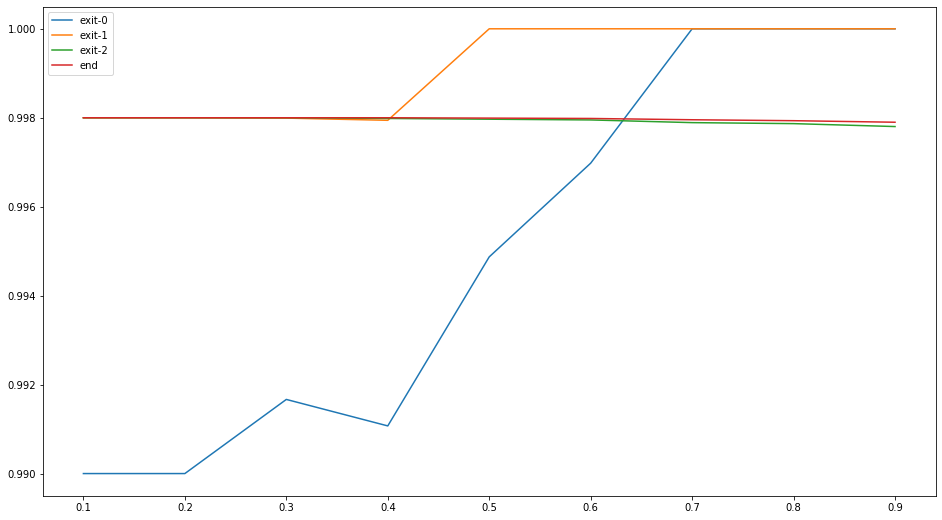

In [13]:
plt.figure(figsize=(16,9))
for i, a in enumerate(acc):
    plt.plot(np.arange(0.1, 1, 0.1), acc[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## number of exited by threshold

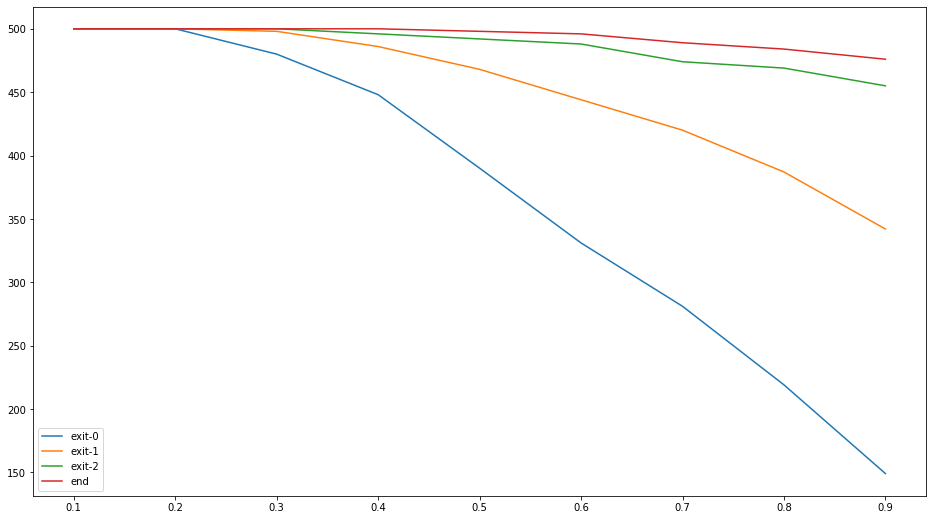

In [9]:
plt.figure(figsize=(16,9))
for i, a in enumerate(exited):
    plt.plot(np.arange(0.1, 1, 0.1), exited[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## falsely exited

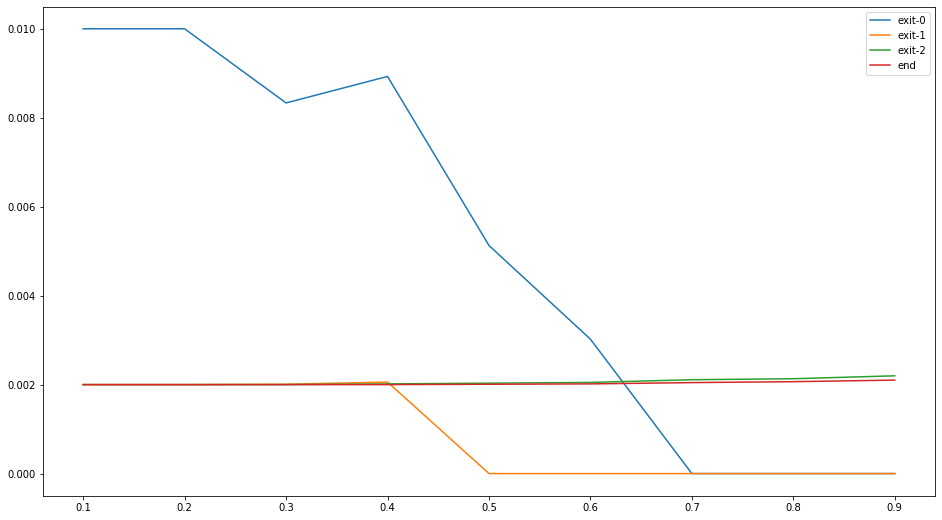

In [10]:
plt.figure(figsize=(16,9))
for i, a in enumerate(false):
    plt.plot(np.arange(0.1, 1, 0.1), false[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

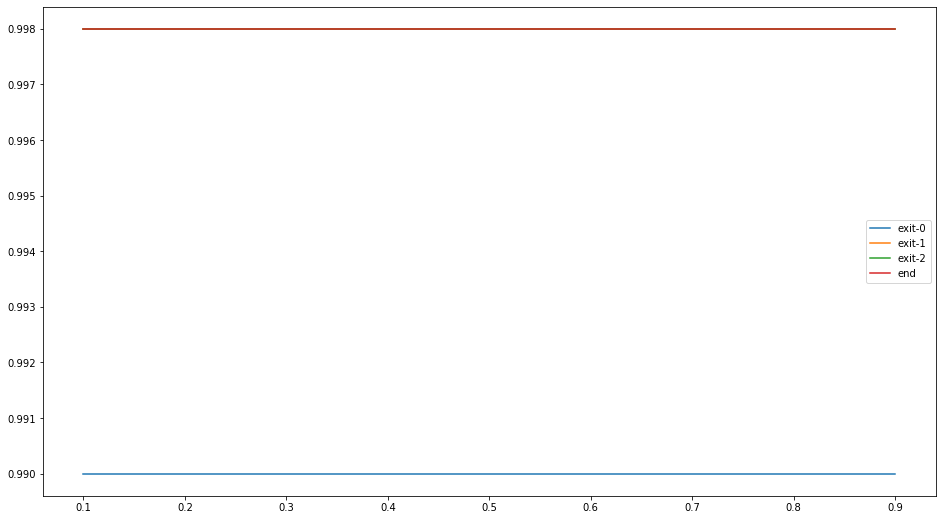

In [11]:
plt.figure(figsize=(16,9))
for i, a in enumerate(exit_acc):
    plt.plot(np.arange(0.1, 1, 0.1), exit_acc[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()